In [1]:
import pymolzilla.processing as pm

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1 import make_axes_locatable
  


import numdifftools as nd

In [2]:
plt.rc('font', size=10) #controls default text size
plt.rc('axes', titlesize=10) #fontsize of the title
plt.rc('axes', labelsize=10) #fontsize of the x and y labels
plt.rc('xtick', labelsize=8) #fontsize of the x tick labels
plt.rc('ytick', labelsize=8) #fontsize of the y tick labels
plt.rc('legend', fontsize=10) #fontsize of the legend

In [6]:
f = pm.cofe_low_t()
f.load()
f.preprocess()
f.process()
f.df

loading set: 0
loading set: 1
loading set: 2
loading set: 3
loading set: 4
loading set: 5
loading set: 6
loading set: 7
loading set: 8
preprocessing set: 0
preprocessing set: 1
preprocessing set: 2
preprocessing set: 3
preprocessing set: 4
preprocessing set: 5
preprocessing set: 6
preprocessing set: 7
preprocessing set: 8
processing set: 0
processing set: 1
processing set: 2
processing set: 3
processing set: 4
processing set: 5
processing set: 6
processing set: 7
processing set: 8


,set,obj,wavelength,flags,sample_rotation,hext
0,0460,<pymolzilla.processing.file_import.SetRotmld o...,460,None,0,207
1,0530,<pymolzilla.processing.file_import.SetRotmld o...,530,None,0,207
2,0620,<pymolzilla.processing.file_import.SetRotmld o...,620,None,0,207
3,0710,<pymolzilla.processing.file_import.SetRotmld o...,710,None,0,207
4,0810,<pymolzilla.processing.file_import.SetRotmld o...,810,None,0,207
5,0920,<pymolzilla.processing.file_import.SetRotmld o...,920,None,0,207
6,1050,<pymolzilla.processing.file_import.SetRotmld o...,1050,None,0,207
7,1200,<pymolzilla.processing.file_import.SetRotmld o...,1200,None,0,207
8,1450,<pymolzilla.processing.file_import.SetRotmld o...,1450,None,0,207


In [7]:
f.analyze()

analyzing set: 0
analyzing set: 1
analyzing set: 2
analyzing set: 3
analyzing set: 4
analyzing set: 5
analyzing set: 6
analyzing set: 7
analyzing set: 8
postprocessing


In [8]:
for ff in f:
    print(ff.fit_anisotropy.results.x)

[ 4.88654881e+00 -4.62338314e+00 -5.48153928e+00 -5.15047206e-03]
[ 4.66043078 -3.18373295 -3.95232864  0.25019084]
[ 4.07830805 -3.42364399 -4.66767583  0.55866511]
[ 4.67938337 -3.25009501 -4.49573858  0.60020764]
[ 3.45822642 -3.49246938 -4.74122419  0.3884702 ]
[ 4.59883763 -3.61556664 -4.57859831  0.40149458]
[ 4.10737195 -3.5664142  -4.51415247  0.62160929]
[ 3.8990756  -3.09054083 -4.5792047   0.61871315]
[ 4.53156667 -3.48373908 -4.60500636  0.61079088]


In [19]:
npoints = 50

ex1 = [3.3*2, 5.3*2]
ey1 = [-4.6*2,-2.6*2]

x1 = np.linspace(*ex1, npoints)
y1 = np.linspace(*ey1, npoints)
xx1, yy1 = np.meshgrid(x1, y1)

ex2 = [-4.9*8, -4.2*8]
ey2 = [0.1*8, 0.8*8]

x2 = np.linspace(*ex2, npoints)
y2 = np.linspace(*ey2, npoints)
xx2, yy2 = np.meshgrid(x2, y2)

dof = 25

In [20]:
def g1(x,y,num):
    k = f[num].fit_anisotropy.results.x
    return f[num].fit_anisotropy.obj([x/2,y/2,k[2],k[3]])
def g2(x,y,num):
    k = f[num].fit_anisotropy.results.x
    return f[num].fit_anisotropy.obj([k[0],k[1],x/8,y/8])

def gglev(num):
    ssr = f[num].fit_anisotropy.obj(f[num].fit_anisotropy.results.x)
    return ssr*(1+4./dof)

def gg1(num):
    return np.vectorize(g1)(xx1,yy1,num)
    
def gg2(num):
    return np.vectorize(g2)(xx2,yy2,num)

zz1=[]
zz2=[]
lev=[]
for i in range(9):
    print(i)
    zz1 += [gg1(i)]
    zz2 += [gg2(i)]
    lev += [gglev(i)]

0
1
2
3
4
5
6
7
8


0
1
2
3
4
5
6
7
8


/tmp/ipykernel_40147/3901960473.py:6: UserWarning: No contour levels were found within the data range.
  ax1.contour(xx1,yy1,zz1[i], levels=[lev[i]], colors='C'+str(i))
/tmp/ipykernel_40147/3901960473.py:7: UserWarning: No contour levels were found within the data range.
  ax2.contour(xx2,yy2,zz2[i], levels=[lev[i]], colors='C'+str(i))


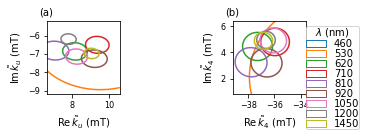

In [21]:
fig, (ax1, ax2) = plt.subplots(1,2, constrained_layout=True, figsize=(5.2,1.8))
arts=[]
labels=[]
for i in range(9):
    print(i)
    ax1.contour(xx1,yy1,zz1[i], levels=[lev[i]], colors='C'+str(i))
    ax2.contour(xx2,yy2,zz2[i], levels=[lev[i]], colors='C'+str(i))
    arts+=[patches.Ellipse((0,0),1,1,fill=False,edgecolor='C'+str(i))]
    labels+=[str(f.df['wavelength'].iloc[i])]
ax1.set_aspect(1)
ax2.set_aspect(1)


ax1.set_xlabel(r"$\operatorname{Re} \tilde{k}_u$ (mT)")
ax2.set_xlabel(r"$\operatorname{Re} \tilde{k}_4$ (mT)")
ax1.set_ylabel(r"$\operatorname{Im} \tilde{k}_u$ (mT)")
ax2.set_ylabel(r"$\operatorname{Im} \tilde{k}_4$ (mT)")

plt.legend(arts,labels,title=r'$\lambda$ (nm)', borderpad=0, labelspacing=0, bbox_to_anchor=(1.8,1))

ax1.text(-0.1, 1.08, "(a)", transform=ax1.transAxes)
ax2.text(-0.1, 1.08, "(b)", transform=ax2.transAxes)

fig.savefig('out/cofe-lowt-anizotropie.pdf')